In [1]:
import scipy.sparse as sp
import numpy as np
import scipy.io as io

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
A_PATH = '../data/A.mtx'
B_PATH = '../data/b.txt'
SHAPE_X = 60 
SHAPE_Y = 220

In [3]:
A = pd.read_csv(A_PATH, sep=' ', names=['1', '2', '3'])
b = pd.read_csv(B_PATH).to_numpy()

A = A.to_numpy()
row = A[:,0]
col = A[:,1]
value = A[:,2]

In [4]:
matrix = sp.coo_matrix((value, (row, col)), shape=(SHAPE_X*SHAPE_Y, SHAPE_X*SHAPE_Y)).toarray()

In [5]:
matrix.shape

(13200, 13200)

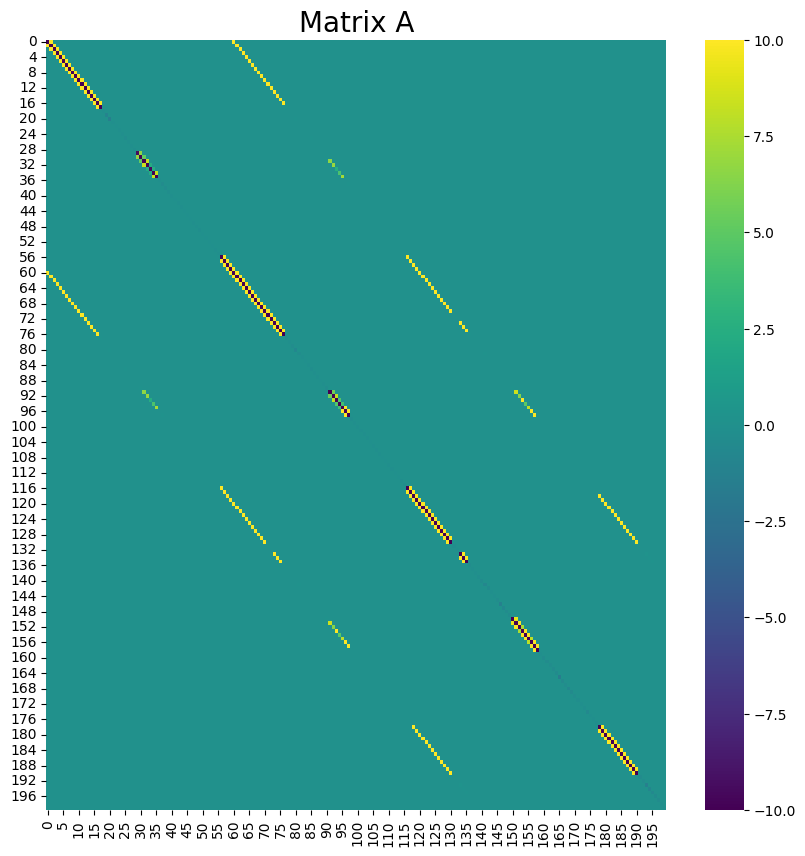

In [6]:
matrix_to_write = matrix[13000:,13000:]
plt.figure(figsize=(10,10))
plt.title("Matrix A", fontsize=20)
sns.heatmap(matrix_to_write, vmin=-10, vmax=10, cmap='viridis')
plt.show()

In [7]:
%%time
solution = sp.linalg.spsolve(matrix, b);

CPU times: user 1.04 s, sys: 191 ms, total: 1.23 s
Wall time: 2.67 s


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [8]:
np.savetxt('solution.txt', solution[:, None])

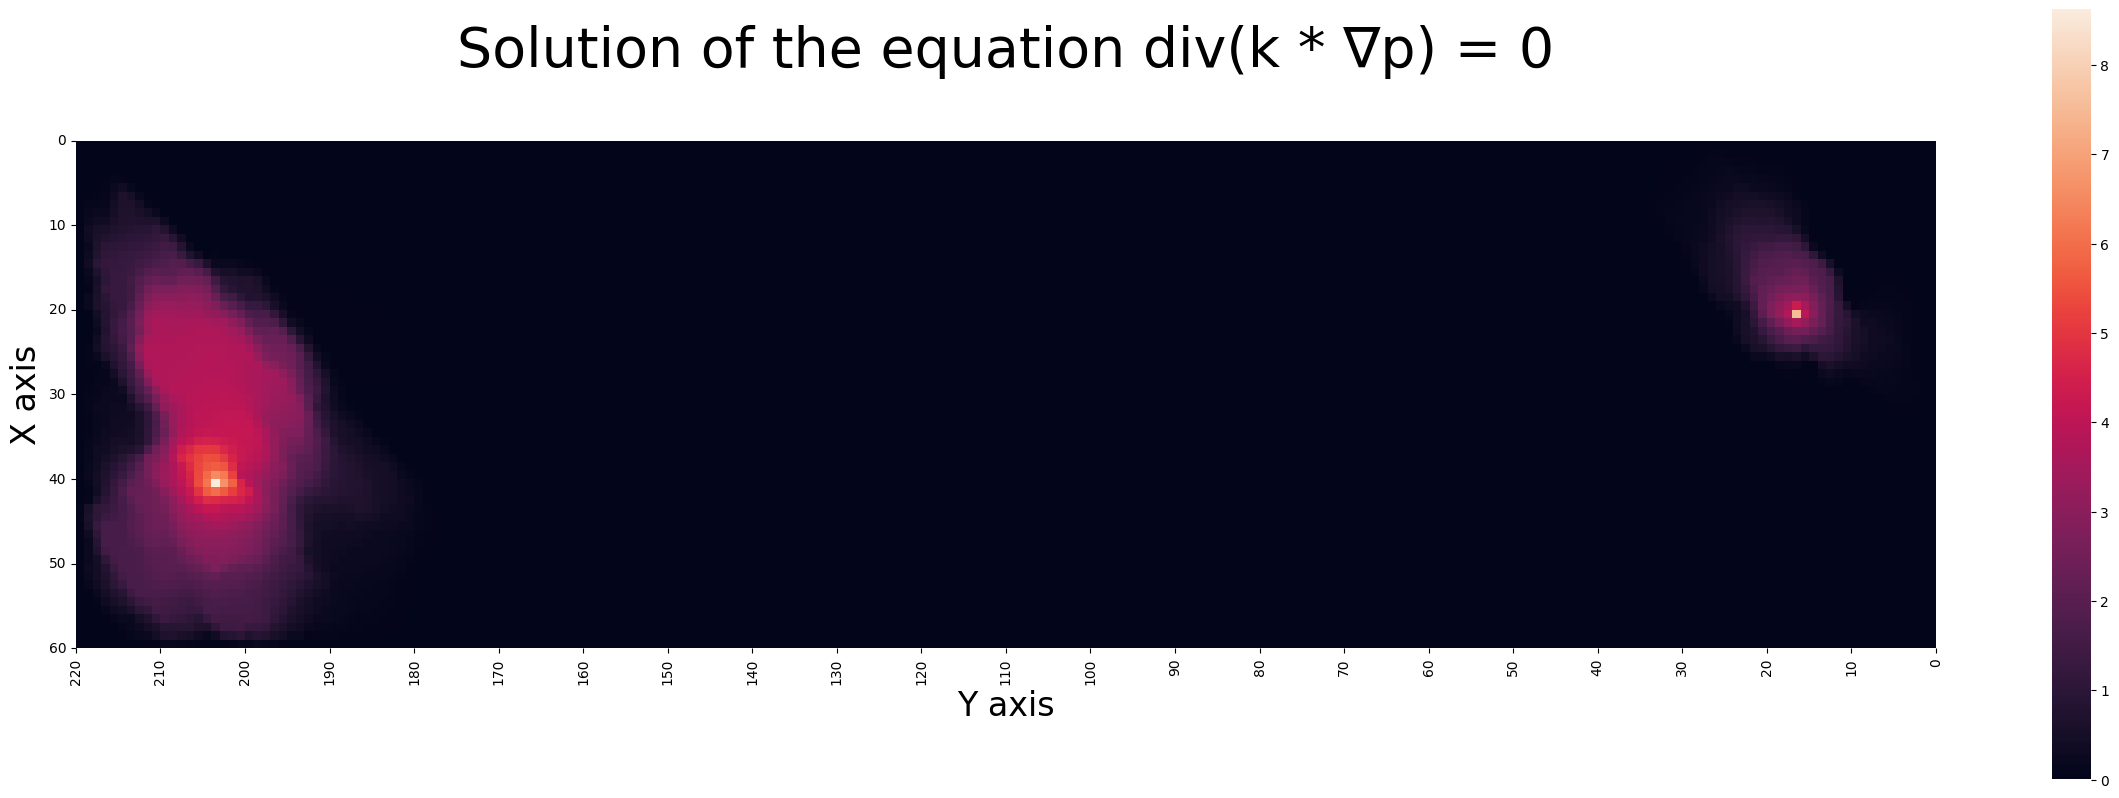

In [9]:
sol = solution.reshape((220,60))
plt.figure(figsize=(30,10))

plt.title("Solution of the equation div(k * ∇p) = 0\n", fontsize=40)
ax = sns.heatmap(data=sol.T,square=True)
ax.set_aspect("equal")
ax.set_ylabel('X axis', fontsize=24)
ax.set_xlabel('Y axis', fontsize=24)
ax.set_xticks(list(range(0, 221, 10)))
ax.set_xticklabels(list(range(220, -1, -10)))
ax.set_yticks(list(range(0, 61, 10)))
ax.set_yticklabels(list(range(0, 61, 10)))

plt.savefig("../data/Example.png")
plt.show()